In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import norm
import time
from scipy.linalg import lu

# SIO 112: CH 3 examples (translated from matlab)

## InvIllu

In [54]:
# 1st argument --> numbers ranging from 0 to 9, 
# 2nd argument, row = 2, col = 3
A = np.random.normal(size=(int(5e3),int(5e3)))
b = np.random.normal(size=(int(5e3)))

In [55]:
start_time = time.time()    # time how long this takes to run

xBad = np.matmul(inv(A),b)  # matrix multiplication (row x col)

print("--- %s seconds ---" % (time.time() - start_time))

--- 6.51547384262085 seconds ---


In [56]:
start_time = time.time()    # time how long this takes to run

xGood = np.linalg.solve(A, b) # solving a linear system

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.9889426231384277 seconds ---


In [57]:
test = xGood - xBad
norm(test)

3.1249972362424688e-09

## GaussSeidelIllustration

Residual after 21 iterations: 5.331201499700045e-07


C:\Users\trin\AppData\Local\Temp/ipykernel_20512/1010116571.py:40: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,(4e1))


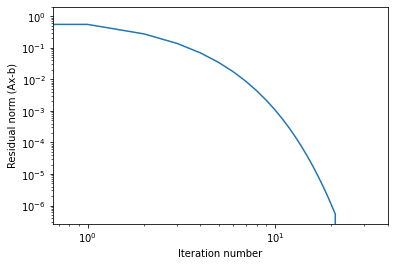

In [3]:
from scipy.linalg import lu
from numpy.linalg import norm
A = np.array([[2,-1,0],
              [-1,2,-1],
              [0,-1,2]])
b = np.array([1,1,1])

a,l,u = lu(A)

xMat = np.linalg.solve(A, b)
#xMAt

L = np.tril(A,-1)
D = np.diag(np.diag(A))
U = np.triu(A,1)

x = [1,1,1]

tol = 1e-6
nmax = int(5e3)
go = 1

Norms = np.zeros(nmax)
Norms[0] = norm(np.matmul(A,x)-b) 
counter = 0

while go == 1:
    x = np.linalg.solve((L+D),(b-(np.matmul(U,x))))
    normNew = norm(np.matmul(A,x)-b)
    #print(normNew)
    if normNew < tol:
        go = 0
    elif counter > nmax:
        go = 0
    counter += 1
    Norms[counter] = normNew
print('Residual after', counter,'iterations:',norm(np.matmul(A,x)-b))

plt.loglog(Norms)
plt.xlim(0,(4e1))
plt.xlabel('Iteration number')
plt.ylabel('Residual norm (Ax-b)');